# Display of low level motion data from manual drive.
## Main Goal: gather positioning data of ideal racing line. 

In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
import pandas as pd
import csv

In [2]:
# 1GO of data (doesn't contain vision input)
clean_rl_data = pd.read_csv("racingline_data.txt") 
clean_rl_data.head()

,cld,x_pose,y_pose,z_pose,pitch,yaw,roll,L_R__velo,U_D_velo,B_A_velo,pitch_velo,yaw_velo,roll_velo,L_R_acc,U_D_acc,B_A_acc
0,0.0,188.94548,5.961958,-186.960541,-0.004375,1.604904,0.010607,-0.000003,0.000032,-0.006549,0.000006,8.520740e-07,3.135483e-07,0.000019,0.000012,-0.000091
1,0.0,188.94548,5.961958,-186.960541,-0.004375,1.604904,0.010607,-0.000003,0.000032,-0.006549,0.000006,8.520740e-07,3.135483e-07,0.000019,0.000012,-0.000091
2,0.0,188.94548,5.961958,-186.960541,-0.004375,1.604904,0.010607,-0.000003,0.000032,-0.006549,0.000006,8.520740e-07,3.135483e-07,0.000019,0.000012,-0.000091
3,0.0,188.94548,5.961958,-186.960541,-0.004375,1.604904,0.010607,-0.000003,0.000032,-0.006549,0.000006,8.520740e-07,3.135483e-07,0.000019,0.000012,-0.000091
4,0.0,188.94548,5.961958,-186.960541,-0.004375,1.604904,0.010607,-0.000003,0.000032,-0.006549,0.000006,8.520740e-07,3.135483e-07,0.000019,0.000012,-0.000091


## Ideal Racing Line

<IPython.core.display.Javascript object>


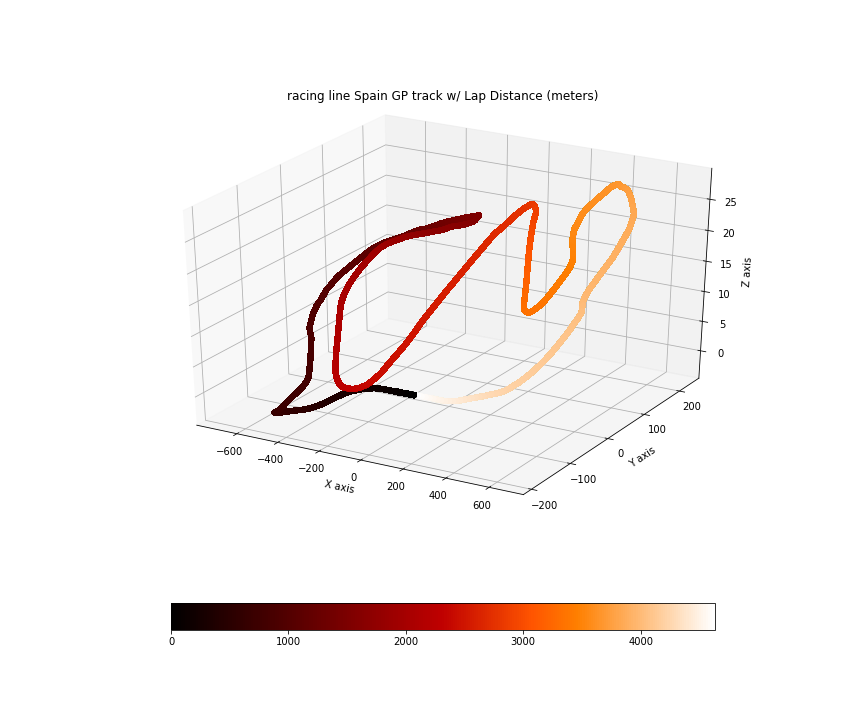

In [9]:
%matplotlib notebook
%matplotlib notebook

# plotting trajectory
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111, projection='3d') # Axes3D(fig)

x = np.array(clean_rl_data['x_pose'])
y = np.array(clean_rl_data['z_pose'])
z = np.array(clean_rl_data['y_pose'])
d = np.array(clean_rl_data['cld'])

plt.title('racing line Spain GP track w/ Lap Distance (meters)\n', size = 12)
ax.set_xlabel('X axis') # ax.set_xlabel('X axis', color='b')
ax.set_ylabel('Y axis') # ax.set_ylabel('Y axis', color='r')
ax.set_zlabel('Z axis') # ax.set_zlabel('Z axis', color='g')
ax.set_label('Lap Dist.') # ax.set_dlabel('D axis', color='g')

img = ax.scatter(x, y, z, c=d, cmap=plt.cm.gist_heat)

# plt.colorbar(img)
fig.colorbar(img, ax=ax, orientation='horizontal', fraction=.05)


plt.show()

## Evolution of X,Y,Z (aka X,Z,Y from PCars 2 perpesctive)

/Users/mikehatchi/anaconda3/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/mikehatchi/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


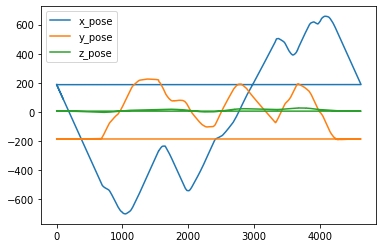

In [3]:
plt.plot(clean_rl_data['cld'], clean_rl_data['x_pose'], label='x_pose')
plt.plot(clean_rl_data['cld'], clean_rl_data['z_pose'], label='y_pose')
plt.plot(clean_rl_data['cld'], clean_rl_data['y_pose'], label='z_pose')
plt.legend()
_ = plt.ylim()

## Evolution of Euler Angle and Angular velocity
reminder: provides Pitch, Yaw, Roll angle of the

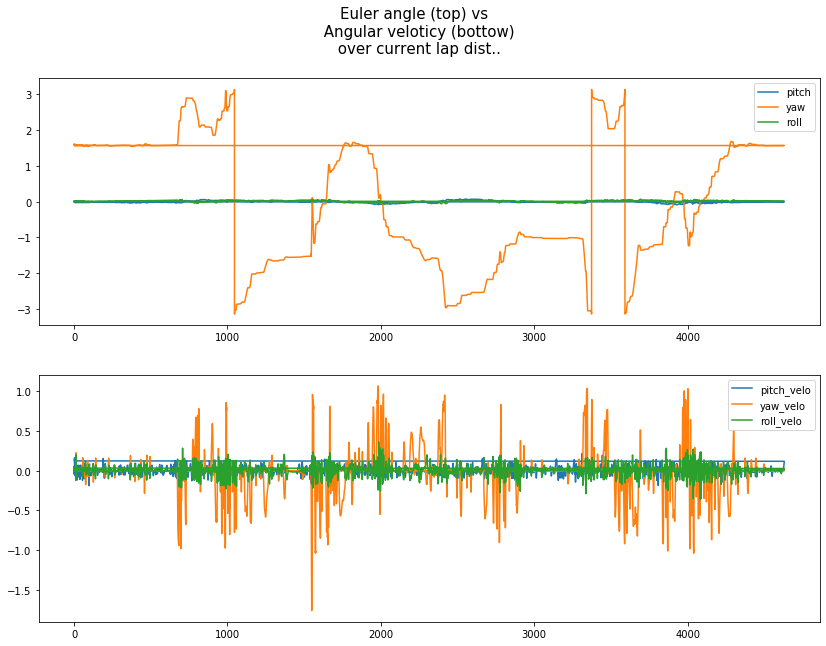

In [4]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 10))

fig.suptitle('Euler angle (top) vs \n Angular veloticy (bottow)\n over current lap dist..', size = 15)

# ax1.title('Euler angle', size = 15)
ax1.plot(clean_rl_data['cld'], clean_rl_data['pitch'], label='pitch')
ax1.plot(clean_rl_data['cld'], clean_rl_data['yaw'], label='yaw')
ax1.plot(clean_rl_data['cld'], clean_rl_data['roll'], label='roll')
ax1.legend()
_ = plt.ylim()


# ax2.title('Angular veloticy', size = 15)
ax2.plot(clean_rl_data['cld'], clean_rl_data['pitch_velo'], label='pitch_velo')
ax2.plot(clean_rl_data['cld'], clean_rl_data['yaw_velo'], label='yaw_velo')
ax2.plot(clean_rl_data['cld'], clean_rl_data['roll_velo'], label='roll_velo')
ax2.legend()
_ = plt.ylim()

## Evolution of Local Velocity and Local Acceleration

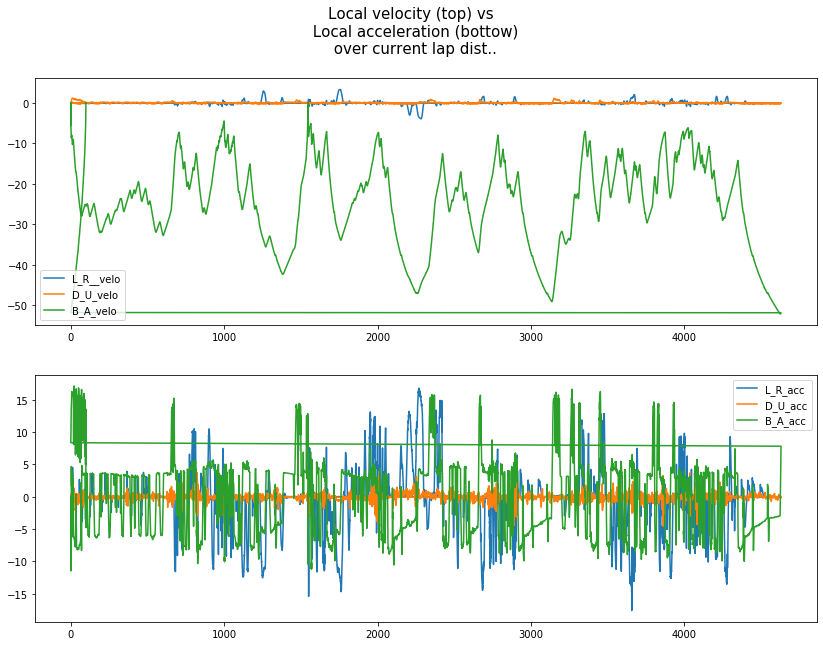

In [5]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 10))

fig.suptitle('Local velocity (top) vs \n Local acceleration (bottow)\n over current lap dist..', size = 15)

# ax1.title('Local velocity', size = 15)
ax1.plot(clean_rl_data['cld'], clean_rl_data['L_R__velo'], label='L_R__velo')  # (+)Left (-)Right
ax1.plot(clean_rl_data['cld'], clean_rl_data['U_D_velo'], label='D_U_velo')      # (+)Down (-)Up
ax1.plot(clean_rl_data['cld'], clean_rl_data['B_A_velo'], label='B_A_velo')    # (+)Braking (-)Acceleration
ax1.legend()
_ = plt.ylim()


# ax2.title('Local acceleration', size = 15)
ax2.plot(clean_rl_data['cld'], clean_rl_data['L_R_acc'], label='L_R_acc') # (+)Left (-)Right
ax2.plot(clean_rl_data['cld'], clean_rl_data['U_D_acc'], label='D_U_acc')   # (+)Down (-)Up
ax2.plot(clean_rl_data['cld'], clean_rl_data['B_A_acc'], label='B_A_acc') # (+)Braking (-)Acceleration
ax2.legend()
_ = plt.ylim()